In [1]:
import pandas as pd
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import numpy as np

def get_num_processed_data(data_path):
    with open(data_path, "r") as f:
        data = f.readlines()
    return len(data)

def get_num_templates(data_path):
    return len(pd.read_csv(data_path))

def get_residual_proportion(data_path):
    num_all_data = get_num_processed_data(data_path)
    with open(data_path + ".processed", "r") as f:
        num_processed = len(f.readlines())
    return "{:.2f}".format(num_processed / num_all_data * 100)

all_rxn_class = ["AdamsDecarboxylation",
                "Baylis-HillmanReaction",
                "Buchwald-HartwigCross-Coupling",
                "Chan_LamCoupling",
                "DielsAlder",
                "FischerIndoleSynthesis",
                "Friedel-CraftsAcylation",
                "Friedel-CraftsAlkylation",
                "GrignardReaction",
                "HiyamaCoupling",
                # "HuisgenCycloaddition",
                "Hydrogenation",
                "Kabachnik-FieldsReaction",
                "KumadaCoupling",
                "MannichReaction",
                "NegishiCoupling",
                "PausonKhandReaction",
                "ReductiveAmination",
                "SuzukiCoupling",
                "WittigReaction",
                ]

## 1. Analysis of the reaction templates including the distinguishment of aromatic and aliphatic atoms

In [24]:
table = PrettyTable()
table.field_names = ["Reaction name", "No. of first templates", "No. of first data", "No. of second templates", "No. of second data", "No. of RDChrial templates"]
for rxn in all_rxn_class:
    num_frist_data = get_num_processed_data(f"../data/{rxn}/MappingResult_{rxn}.txt.processed")
    num_first_template = get_num_templates(f"../data/{rxn}/all_templates_used.csv")
    num_second_data = get_num_processed_data(f"../data_aro_ali_diff/{rxn}/MappingResult_{rxn}.txt.processed")
    num_second_template = get_num_templates(f"../data_aro_ali_diff/{rxn}/all_templates_used.csv")
    num_rdchiral_template = get_num_templates(f"../data/{rxn}/rdchiral_templates.csv")
    table.add_row([rxn, num_first_template, num_frist_data, num_second_template, num_second_data, num_rdchiral_template])
print(table)

+--------------------------------+------------------------+-------------------+-------------------------+--------------------+---------------------------+
|         Reaction name          | No. of first templates | No. of first data | No. of second templates | No. of second data | No. of RDChrial templates |
+--------------------------------+------------------------+-------------------+-------------------------+--------------------+---------------------------+
|      AdamsDecarboxylation      |           54           |        1641       |            55           |        1595        |            1491           |
|     Baylis-HillmanReaction     |           84           |        6101       |            87           |        6080        |            2697           |
| Buchwald-HartwigCross-Coupling |           96           |       16627       |           104           |       16545        |            4081           |
|        Chan_LamCoupling        |           43           |        634

### 1.1 Take Negishi coupling as an example:

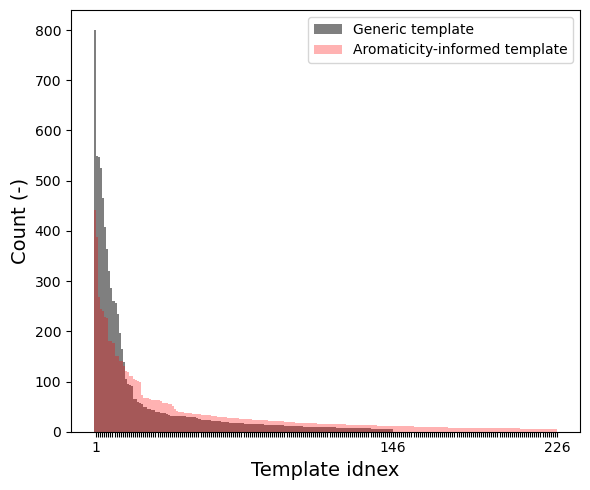

In [21]:
negishi_template_1 = pd.read_csv("../data/NegishiCoupling/all_templates_used.csv")
negishi_template_2 = pd.read_csv("../data_aro_ali_diff/NegishiCoupling/all_templates_used.csv")

threshold = 5
negishi_template_1 = negishi_template_1[negishi_template_1["count"] > threshold]
names, counts = negishi_template_1["template"], negishi_template_1["count"]
num_labels = len(names)
names = [1] + ['']*(num_labels - 2) + [num_labels]
pos = np.arange(len(names))
width = 1.0
plt.figure(figsize=(6,5),dpi=100)
ax = plt.axes()

plt.bar(pos, counts, width, color="black", alpha=0.5, label="Generic template")

negishi_template_2 = negishi_template_2[negishi_template_2["count"] > threshold]
names, counts = negishi_template_2["template"], negishi_template_2["count"]
num_labels = len(names)
names = [1] + ['']*144 + ['146'] + [''] * (num_labels - 147) + [num_labels]
pos = np.arange(len(names))
width = 1.0

plt.bar(pos, counts, width, color="red", alpha=0.3, label="Aromaticity-informed template")
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(names,)# rotation=-65, ha='left')
plt.ylabel('Count (-)', fontsize=14)
plt.legend()
plt.xlabel('Template idnex', fontsize=14)
plt.tight_layout()
plt.savefig("../docs/negishi_coupling_templates.svg", format="svg", bbox_inches = "tight")

### 1.2 Visualized the reactions that using aromatic-aliphatic-distinguighing templates cannot recover.

In [27]:
import sys
sys.path.append("../")
from autotemplate.extract_utils import extract_from_rxn_smiles
from autotemplate.run_utils import rdchiralRunText_modified

# rxn_smiles = "[nH:5]1[cH:6][n:7][c:8]2[cH:9][cH:10][cH:11][cH:12][c:13]12.c1ccc([B-](c2ccccc2)(c2ccccc2)[c:4]2[cH:3][cH:2][cH:1][cH:15][cH:14]2)cc1>>[cH:1]1[cH:2][cH:3][c:4](-[n:5]2[cH:6][n:7][c:8]3[cH:9][cH:10][cH:11][cH:12][c:13]23)[cH:14][cH:15]1"
# reaction_ids = "50699132"
# rxn_smiles = "[Cl:1][c:2]1[n:3][cH:4][c:5]([Br:14])[cH:12][n:13]1.[c:6]1([B:16]([OH:15])[OH:17])[cH:7][cH:8][cH:9][cH:10][cH:11]1>>[Cl:1][c:2]1[n:3][cH:4][c:5](-[c:6]2[cH:7][cH:8][cH:9][cH:10][cH:11]2)[cH:12][n:13]1"
rxn_smiles = "Br[c:5]1[cH:4][n:3][c:2]([Cl:1])[n:13][cH:12]1.OB(O)[c:6]1[cH:7][cH:8][cH:9][cH:10][cH:11]1>>[Cl:1][c:2]1[n:3][cH:4][c:5](-[c:6]2[cH:7][cH:8][cH:9][cH:10][cH:11]2)[cH:12][n:13]1"
reaction_id = "23053890" # Suzuki coupling
product = rxn_smiles.split(">>")[1]

generic_template = extract_from_rxn_smiles(rxn_smiles)
# aromatic_aliphatic_distinguighing_template = "[c:1]-[n:2]>>[c:1]-[B-](-c1:c:c:c:c:c:1)(-c1:c:c:c:c:c:1)-c1:c:c:c:c:c:1.[n:2]"

print(generic_template)
print(rdchiralRunText_modified(generic_template, product))

[#6:1]-[#6:2]>>Br-[#6:1].O-B(-O)-[#6:2]
['[Cl:1][c:2]1[n:3][cH:4][c:5]([Br:14])[cH:12][n:13]1.[c:6]1([B:16]([OH:15])[OH:17])[cH:7][cH:8][cH:9][cH:10][cH:11]1', '[Cl:1][c:2]1[n:3][cH:4][c:5]([B:16]([OH:15])[OH:17])[cH:12][n:13]1.[c:6]1([Br:14])[cH:7][cH:8][cH:9][cH:10][cH:11]1']


## Analysis of downsampling

In [2]:
percents = [str(10), str(25), str(50), str(75)]
table = PrettyTable()
table.field_names = ["Reaction name", "No. templates (10%)", "Resiudal proportion (10%)", "No. templates (25%)", "Resiudal proportion (25%)", 
                     "No. templates (50%)", "Resiudal proportion (50%)", "No. templates (75%)", "Resiudal proportion (75%)", "No. templates (100%)", "Resiudal proportion (100%)"]

for rxn in all_rxn_class:
    table_row = [rxn]
    for percent in percents:
        rp_percent_data = get_residual_proportion(f"../data_{percent}perc/{rxn}/MappingResult_{rxn}.txt")
        num_percent_template = get_num_templates(f"../data_{percent}perc/{rxn}/all_templates_used.csv")
        table_row += [num_percent_template, rp_percent_data]
    rp_frist_data = get_residual_proportion(f"../data/{rxn}/MappingResult_{rxn}.txt")
    num_first_template = get_num_templates(f"../data/{rxn}/all_templates_used.csv")
    table_row += [num_first_template, rp_frist_data]
    table.add_row(table_row)
print(table)

+--------------------------------+---------------------+---------------------------+---------------------+---------------------------+---------------------+---------------------------+---------------------+---------------------------+----------------------+----------------------------+
|         Reaction name          | No. templates (10%) | Resiudal proportion (10%) | No. templates (25%) | Resiudal proportion (25%) | No. templates (50%) | Resiudal proportion (50%) | No. templates (75%) | Resiudal proportion (75%) | No. templates (100%) | Resiudal proportion (100%) |
+--------------------------------+---------------------+---------------------------+---------------------+---------------------------+---------------------+---------------------------+---------------------+---------------------------+----------------------+----------------------------+
|      AdamsDecarboxylation      |          5          |           37.26           |          9          |           42.79           |     

## Recovery of by-products using CGRTools

original reaction:


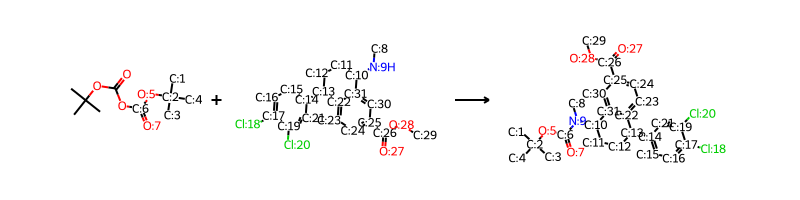

After processed:
[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[O:39][C:37]([O:36][C:33]([CH3:32])([CH3:34])[CH3:35])=[O:38].[CH3:8][NH:9][C@H:10]1[CH2:11][CH2:12][C@@H:13]([c:14]2[cH:15][cH:16][c:17]([Cl:18])[c:19]([Cl:20])[cH:21]2)[c:22]2[cH:23][cH:24][c:25]([C:26](=[O:27])[O:28][CH3:29])[cH:30][c:31]21>>[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[N:9]([CH3:8])[C@H:10]1[CH2:11][CH2:12][C@@H:13]([c:14]2[cH:15][cH:16][c:17]([Cl:18])[c:19]([Cl:20])[cH:21]2)[c:22]2[cH:23][cH:24][c:25]([C:26](=[O:27])[O:28][CH3:29])[cH:30][c:31]21.[CH3:32][C:33]([CH3:34])([CH3:35])[O:36][C:37](=[O:38])[OH:39]


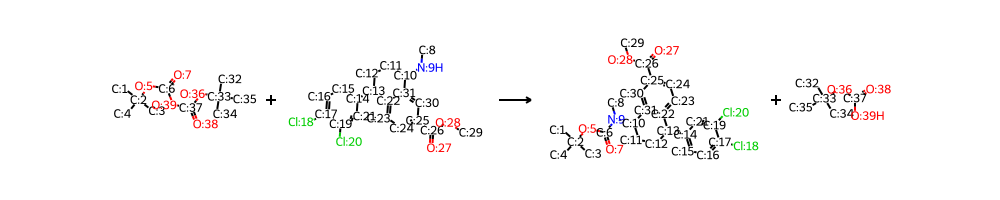

In [5]:
import sys
sys.path.append("../")
from autotemplate.graph_utils import balance_rxn_smiles
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions as Reactions

# Reaction taken from the USPTO-50k dataset, with reaction ID: US20100009970A1_44
rxn_smiles = "CC(C)(C)OC(=O)O[C:6]([O:5][C:2]([CH3:1])([CH3:3])[CH3:4])=[O:7].[CH3:8][NH:9][C@H:10]1[CH2:11][CH2:12][C@@H:13]([c:14]2[cH:15][cH:16][c:17]([Cl:18])[c:19]([Cl:20])[cH:21]2)[c:22]2[cH:23][cH:24][c:25]([C:26](=[O:27])[O:28][CH3:29])[cH:30][c:31]21>>[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7])[N:9]([CH3:8])[C@H:10]1[CH2:11][CH2:12][C@@H:13]([c:14]2[cH:15][cH:16][c:17]([Cl:18])[c:19]([Cl:20])[cH:21]2)[c:22]2[cH:23][cH:24][c:25]([C:26](=[O:27])[O:28][CH3:29])[cH:30][c:31]21"
balanced_rxn_smiles = balance_rxn_smiles(rxn_smiles)

rxn_1 = Reactions.ReactionFromSmarts(rxn_smiles, useSmiles=True)
rxn_2 = Reactions.ReactionFromSmarts(balanced_rxn_smiles, useSmiles=True)

print("original reaction:")
display(Draw.ReactionToImage(rxn_1))
print("After processed:")
print(balanced_rxn_smiles)
display(Draw.ReactionToImage(rxn_2))